In [1]:
import pandas as pd
import numpy as np
import skbio
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import researchpy as rp
from matplotlib import rcParams
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from statsmodels.stats.multicomp import MultiComparison
#dunns
from itertools import combinations
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.libqsturng import psturng
import warnings

import plotly.express as px
import plotly.graph_objects as go
import os


rcParams.update({'figure.autolayout': True})

In [2]:
date = '23.9.19'

In [3]:
if not os.path.exists(f'../../../../data/plots/luminescence/{date}'):
    os.mkdir(f'../../../../data/plots/luminescence/{date}')

In [4]:
luminescence_means = f'../../../../data/luminescence/to_be_sorted/{date}/output_means.csv'
luminescence_raw = f'../../../../data/luminescence/to_be_sorted/{date}/output_raw.csv'

In [5]:
luminescence_means_df = pd.read_csv(luminescence_means, header=0)
luminescence_raw_df = pd.read_csv(luminescence_raw, header=0)

In [6]:
luminescence_means_df

,name,condition,mean_luminescence,standard_error,date
0,13 + 34,10 mM KNO3 in W5,13.075795,NaN,23.9.19
1,14 + 34,10 mM KNO3 in W5,21.671293,3.382465,23.9.19
2,14 + 34,W5,16.959906,3.777065,23.9.19
3,15 + 34,10 mM KNO3 in W5,6.883883,0.759541,23.9.19
4,15 + 34,W5,8.738052,0.932603,23.9.19
5,16 + 34,10 mM KNO3 in W5,7.130038,0.248288,23.9.19
6,16 + 34,W5,9.243610,2.112628,23.9.19
7,17 + 34,10 mM KNO3 in W5,4.020863,0.216422,23.9.19
8,17 + 34,W5,3.941669,1.128703,23.9.19
9,18 + 34,10 mM KNO3 in W5,4.411550,0.814237,23.9.19


In [7]:
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date
0,C,1,Sample X3,2625.0,12182.0,21 + 34,W5,4.640762,23.9.19
1,D,1,Sample X4,938.0,4026.0,22 + 34,W5,4.292111,23.9.19
2,E,1,Sample X5,17688.0,66136.0,23 + 34,W5,3.739032,23.9.19
3,F,1,Sample X6,8782.0,33715.0,24 + 34,W5,3.839103,23.9.19
4,G,1,Sample X7,4743.0,191684.0,35 + 34,W5,40.414084,23.9.19
...,...,...,...,...,...,...,...,...,...
65,C,12,Sample X86,2145.0,16243.0,15 + 34,10 mM KNO3 in W5,7.572494,23.9.19
66,D,12,Sample X87,3975.0,28520.0,16 + 34,10 mM KNO3 in W5,7.174843,23.9.19
67,E,12,Sample X88,1492.0,5436.0,17 + 34,10 mM KNO3 in W5,3.643432,23.9.19
68,F,12,Sample X89,1888.0,10320.0,18 + 34,10 mM KNO3 in W5,5.466102,23.9.19


In [8]:
#remove column 12

In [9]:
#add promoter names column
luminescence_raw_df['Promoter'] = luminescence_raw_df.name 

In [10]:
# luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 72', 'Promoter'] = 'UBQ10'
# luminescence_raw_df.loc[luminescence_raw_df.name == '71+72', 'Promoter'] = 'UBQ10'
# luminescence_raw_df.loc[luminescence_raw_df.name == '25+72', 'Promoter'] = 'NIR1'
# luminescence_raw_df.loc[luminescence_raw_df.name == '35+72', 'Promoter'] = 'NOS'
# luminescence_raw_df.loc[luminescence_raw_df.name == '36+72', 'Promoter'] = 'STAP4'
# luminescence_raw_df.loc[luminescence_raw_df.name == '92+72', 'Promoter'] = 'NRP'
# luminescence_raw_df.loc[luminescence_raw_df.name == '92+29+72', 'Promoter'] = 'NRP+NLP7_TF'
luminescence_raw_df.loc[luminescence_raw_df.name == '25 + 34', 'Promoter'] = 'NIR1(1000bp)'
luminescence_raw_df.loc[luminescence_raw_df.name == '35 + 34', 'Promoter'] = 'NOS'
luminescence_raw_df.loc[luminescence_raw_df.name == '36 + 34', 'Promoter'] = 'STAP4'
luminescence_raw_df.loc[luminescence_raw_df.name == '70 + 34', 'Promoter'] = '35S'
luminescence_raw_df.loc[luminescence_raw_df.name == '14 + 34', 'Promoter'] = 'ANAC032(1000bp)'
luminescence_raw_df.loc[luminescence_raw_df.name == '13 + 34', 'Promoter'] = 'ANAC032(500bp)'
luminescence_raw_df.loc[luminescence_raw_df.name == '15 + 34', 'Promoter'] = 'ANR1(500bp)'
luminescence_raw_df.loc[luminescence_raw_df.name == '16 + 34', 'Promoter'] = 'ANR1(1000bp)'
luminescence_raw_df.loc[luminescence_raw_df.name == '17 + 34', 'Promoter'] = 'ARF18(500bp)'
luminescence_raw_df.loc[luminescence_raw_df.name == '18 + 34', 'Promoter'] = 'ARF18(1000bp)'
luminescence_raw_df.loc[luminescence_raw_df.name == '21 + 34', 'Promoter'] = 'DREB26(500bp)'
luminescence_raw_df.loc[luminescence_raw_df.name == '22 + 34', 'Promoter'] = 'DREB26(1000bp)'
luminescence_raw_df.loc[luminescence_raw_df.name == '23 + 34', 'Promoter'] = 'NLP7(500bp)'
luminescence_raw_df.loc[luminescence_raw_df.name == '24 + 34', 'Promoter'] = 'NLP7(1000bp)'
#luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 34', 'Promoter'] = 'UBQ10:LucN/35S:LucF'

In [11]:
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date,Promoter
0,C,1,Sample X3,2625.0,12182.0,21 + 34,W5,4.640762,23.9.19,DREB26(500bp)
1,D,1,Sample X4,938.0,4026.0,22 + 34,W5,4.292111,23.9.19,DREB26(1000bp)
2,E,1,Sample X5,17688.0,66136.0,23 + 34,W5,3.739032,23.9.19,NLP7(500bp)
3,F,1,Sample X6,8782.0,33715.0,24 + 34,W5,3.839103,23.9.19,NLP7(1000bp)
4,G,1,Sample X7,4743.0,191684.0,35 + 34,W5,40.414084,23.9.19,NOS
...,...,...,...,...,...,...,...,...,...,...
65,C,12,Sample X86,2145.0,16243.0,15 + 34,10 mM KNO3 in W5,7.572494,23.9.19,ANR1(500bp)
66,D,12,Sample X87,3975.0,28520.0,16 + 34,10 mM KNO3 in W5,7.174843,23.9.19,ANR1(1000bp)
67,E,12,Sample X88,1492.0,5436.0,17 + 34,10 mM KNO3 in W5,3.643432,23.9.19,ARF18(500bp)
68,F,12,Sample X89,1888.0,10320.0,18 + 34,10 mM KNO3 in W5,5.466102,23.9.19,ARF18(1000bp)


In [12]:
luminescence_raw_df.condition.unique()

array(['W5', '10 mM KNO3 in W5'], dtype=object)

In [13]:
#sort rows by the custom promoter order I want so plots are in the correct order
luminescence_raw_df.Promoter = pd.Categorical(luminescence_raw_df.Promoter,
                                              ['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)'])
luminescence_raw_df.sort_values("Promoter")

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date,Promoter
22,G,4,Sample X31,2143.0,131904.0,35 + 34,10 mM KNO3 in W5,61.551097,23.9.19,NOS
4,G,1,Sample X7,4743.0,191684.0,35 + 34,W5,40.414084,23.9.19,NOS
34,G,6,Sample X47,3508.0,446316.0,35 + 34,10 mM KNO3 in W5,127.228050,23.9.19,NOS
10,G,2,Sample X15,10868.0,762599.0,35 + 34,W5,70.169212,23.9.19,NOS
28,G,5,Sample X39,5682.0,496525.0,35 + 34,10 mM KNO3 in W5,87.385604,23.9.19,NOS
...,...,...,...,...,...,...,...,...,...,...
47,B,9,Sample X64,832.0,8349.0,14 + 34,W5,10.034856,23.9.19,NaN
53,A,10,Sample X70,3272.0,42784.0,13 + 34,10 mM KNO3 in W5,13.075795,23.9.19,NaN
54,B,10,Sample X71,6726.0,150619.0,14 + 34,10 mM KNO3 in W5,22.393547,23.9.19,NaN
59,B,11,Sample X78,4620.0,125365.0,14 + 34,10 mM KNO3 in W5,27.135281,23.9.19,NaN


In [14]:
#set style to ticks
sns.set(style="ticks", color_codes=True)

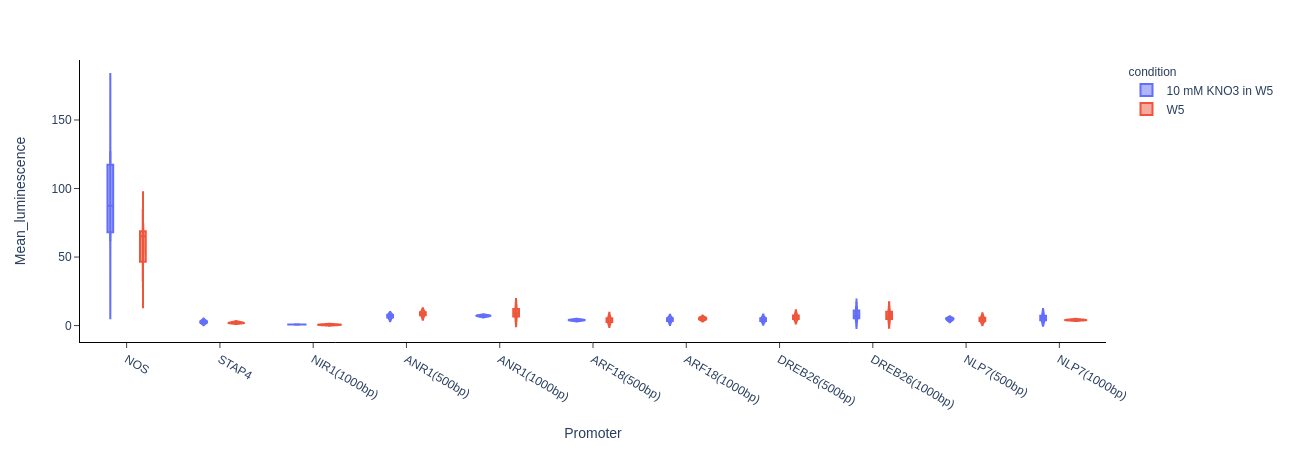

In [23]:
#layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )
fig = px.violin(luminescence_raw_df.sort_values("Promoter"), y="nluc/fluc", x="Promoter", color="condition", box=True, hover_data=luminescence_raw_df.columns) #points="all"

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean_luminescence')
#write to file static image and interactive one
#fig.write_image(f'../../../../data/plots/luminescence/{date}/violin23.9.19.pdf')
#fig.write_html(f'../../../../data/plots/luminescence/{date}/violin23.9.19.html')

fig.show()

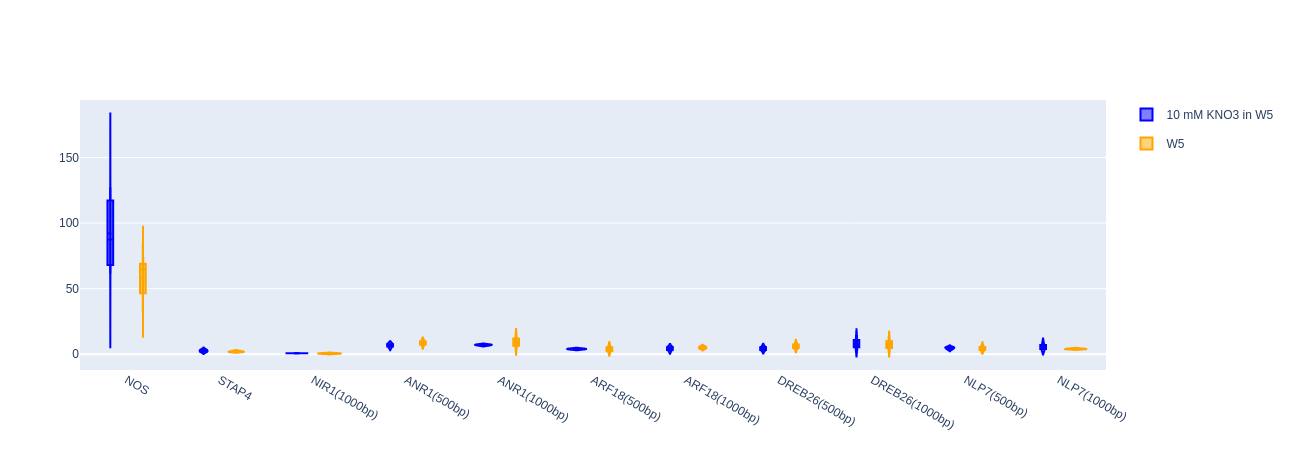

In [44]:

fig = go.Figure()
df = luminescence_raw_df.sort_values("Promoter")import plotly.graph_objects as go
fig.add_trace(go.Violin(x=df['Promoter'][ df['condition'] == '10 mM KNO3 in W5' ],
                        y=df['nluc/fluc'][ df['condition'] == '10 mM KNO3 in W5' ],
                        legendgroup='10 mM KNO3 in W5', scalegroup='10 mM KNO3 in W5', name='10 mM KNO3 in W5',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['Promoter'][ df['condition'] == 'W5' ],
                        y=df['nluc/fluc'][ df['condition'] == 'W5' ],
                        legendgroup='W5', scalegroup='W5', name='W5',
                        line_color='orange')
             )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')
fig.show()


[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

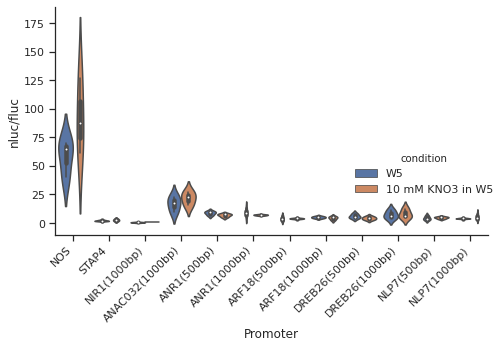

In [88]:
plot = sns.catplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, hue='condition', kind='violin',
                   order=['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)'])
#plot points
[plt.setp(ax.get_xticklabels(), rotation=45, ha='right') for ax in plot.axes.flat]

#ax = sns.swarmplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, color=".25",
             #      order=['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)']).get_figure().savefig(f'../../../../data/plots/luminescence/{date}/luminescence_violin.pdf', format='pdf')

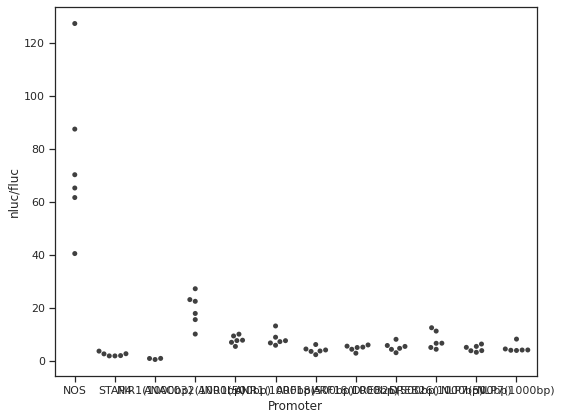

In [78]:
plot = sns.swarmplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, color=".25",
                   order=['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)'])

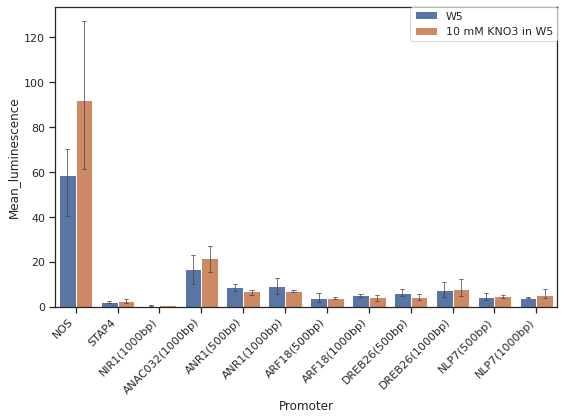

In [77]:
#set figure size
#sns.set(rc={'figure.figsize':(8,6)}, style="ticks", color_codes=True)
#bar chart, 95% confidence intervals
plot = sns.barplot(x="Promoter", y="nluc/fluc", hue="condition", data=luminescence_raw_df, ci=95, capsize=0.1,errwidth=0.7,n_boot=10000,
                   order=['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)'   ])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.legend(loc='upper right', borderaxespad=0.)
plt.ylabel("Mean_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence.pdf', format='pdf')

### get names of each condition for later

In [64]:
pd.Categorical(luminescence_raw_df.condition)
names = luminescence_raw_df.condition.unique()
for name in names:
    print(name)

W5
10 mM KNO3 in W5


In [65]:
#get list of promoters
pd.Categorical(luminescence_raw_df.Promoter)
prom_names = luminescence_raw_df.Promoter.unique()
for name in prom_names:
    print(name)

DREB26(500bp)
DREB26(1000bp)
NLP7(500bp)
NLP7(1000bp)
NOS
STAP4
ANAC032(1000bp)
ANR1(500bp)
ANR1(1000bp)
ARF18(500bp)
ARF18(1000bp)
NIR1(1000bp)
ANAC032(500bp)


### test normality

In [66]:
#returns test statistic, p-value
for name1 in prom_names:
    for name in names:
        print(name1,'{}: {}'.format(name, stats.shapiro(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == name])))


DREB26(500bp) W5: (0.5567470788955688, 4.104734774301733e-09)
DREB26(500bp) 10 mM KNO3 in W5: (0.4752877354621887, 4.789532659366103e-10)
DREB26(1000bp) W5: (0.5567470788955688, 4.104734774301733e-09)
DREB26(1000bp) 10 mM KNO3 in W5: (0.4752877354621887, 4.789532659366103e-10)
NLP7(500bp) W5: (0.5567470788955688, 4.104734774301733e-09)
NLP7(500bp) 10 mM KNO3 in W5: (0.4752877354621887, 4.789532659366103e-10)
NLP7(1000bp) W5: (0.5567470788955688, 4.104734774301733e-09)
NLP7(1000bp) 10 mM KNO3 in W5: (0.4752877354621887, 4.789532659366103e-10)
NOS W5: (0.5567470788955688, 4.104734774301733e-09)
NOS 10 mM KNO3 in W5: (0.4752877354621887, 4.789532659366103e-10)
STAP4 W5: (0.5567470788955688, 4.104734774301733e-09)
STAP4 10 mM KNO3 in W5: (0.4752877354621887, 4.789532659366103e-10)
ANAC032(1000bp) W5: (0.5567470788955688, 4.104734774301733e-09)
ANAC032(1000bp) 10 mM KNO3 in W5: (0.4752877354621887, 4.789532659366103e-10)
ANR1(500bp) W5: (0.5567470788955688, 4.104734774301733e-09)
ANR1(500bp

#### not normal

In [67]:
#test variance
stats.levene(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == names[0]], 
               luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == names[1]])

LeveneResult(statistic=0.3520752753459295, pvalue=0.5549092485746359)

In [60]:
test = luminescence_raw_df.groupby('Promoter')

In [61]:
test

# Kruskal-Wallis one way analysis of variance: scipy.stats.kruskal

In [68]:
# #luminescence kurskal wallis
# for promoter, value in test:
#     print(promoter)
#     print(stats.kruskal(value['nluc/fluc'][value.condition == names[0]], 
#                value['nluc/fluc'][value.condition == names[1]],
#                 value['nluc/fluc'][value.condition == names[2]],
#                       value['nluc/fluc'][value.condition == names[3]],
#                        value['nluc/fluc'][value.condition == names[4]]))

In [70]:
# #Mann-whitney individual comparisons. Correct using tukey. NO USE DUNN's test! "You should use Dunn's test∗. If one proceeds by moving from a rejection of Kruskal-Wallis to performing ordinary pair-wise rank sum tests (with or without multiple comparison adjustments), one runs into two problems: (1) the ranks that the pair-wise rank sum tests use are not the ranks used by the Kruskal-Wallis test; and (2) Dunn's test preserves a pooled variance for the tests implied by the Kruskal-Wallis null hypothesis."
# #https://stats.stackexchange.com/questions/25815/post-hoc-tests-after-kruskal-wallis-dunns-test-or-bonferroni-corrected-mann-wh
for promoter, value in test:
    print(promoter)
    print(stats.mannwhitneyu(value['nluc/fluc'][value.condition == names[0]], 
               value['nluc/fluc'][value.condition == names[1]]))


ANAC032(1000bp)
MannwhitneyuResult(statistic=3.0, pvalue=0.3312602917700287)
ANAC032(500bp)
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
ANR1(1000bp)
MannwhitneyuResult(statistic=3.0, pvalue=0.3312602917700287)
ANR1(500bp)
MannwhitneyuResult(statistic=2.0, pvalue=0.19136654444261297)
ARF18(1000bp)
MannwhitneyuResult(statistic=3.0, pvalue=0.3312602917700287)
ARF18(500bp)
MannwhitneyuResult(statistic=3.0, pvalue=0.3312602917700287)
DREB26(1000bp)
MannwhitneyuResult(statistic=3.0, pvalue=0.3312602917700287)
DREB26(500bp)
MannwhitneyuResult(statistic=2.0, pvalue=0.19136654444261297)
NIR1(1000bp)
MannwhitneyuResult(statistic=0.0, pvalue=0.27014568730370997)
NLP7(1000bp)
MannwhitneyuResult(statistic=4.0, pvalue=0.5)
NLP7(500bp)
MannwhitneyuResult(statistic=3.0, pvalue=0.3312602917700287)
NOS
MannwhitneyuResult(statistic=2.0, pvalue=0.19136654444261297)
STAP4
MannwhitneyuResult(statistic=2.0, pvalue=0.19136654444261297)


/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
